In [14]:
import numpy as np
import math as mt
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

In [10]:
THETA_MIN      = 2.5            # Minimum angular scale (in arcminutes)
THETA_MAX      = 900.           # Maximum angular scale (in arcminutes)
N_ANGULAR_BINS = 26             # Number of angular bins

N_LENS_BINS    = 5              # Number of lens tomographic bins
N_SRC_BINS     = 5              # Number of source tomographic bins

N_XI_POWERSPECTRA = int(N_SRC_BINS * (N_SRC_BINS + 1) / 2)      # Number of power spectra

In [58]:
theta_bins = np.logspace(np.log10(THETA_MIN), np.log10(THETA_MAX), N_ANGULAR_BINS+1)
print(theta_bins)

[  2.5          3.1351573    3.93168452   4.93057977   6.18325727
   7.75419366   9.72424675  12.19481728  15.29306817  19.17846972
  24.05100775  30.16147701  37.82438994  47.4341649   59.48542736
  74.59846874  93.55117356 117.31905791 147.12548036 184.50460955
 231.38038945 290.16556688 363.88587816 456.33578701 572.27378967
 717.66733986 900.        ]


In [82]:
####Fiducial
ξ_plus_CUTOFF  = 2.756             # cutoff scale in arcminutes
ξ_minus_CUTOFF = 8.696             # cutoff scale in arcminutes

lens_cutoff = [80.88, 54.19, 42.85, 35.43, 29.73]       # cutoff scale in arcmins. 
                                                        # Different for different redshift bins
##########

ξ_plus_mask  = (theta_bins[:-1] > ξ_plus_CUTOFF)
ξ_minus_mask = (theta_bins[:-1] > ξ_minus_CUTOFF)

ξ_plus_fullmask  = np.hstack([ξ_plus_mask for i in range(N_XI_POWERSPECTRA)])
ξ_minus_fullmask = np.hstack([ξ_minus_mask for i in range(N_XI_POWERSPECTRA)])


lens_mask_list = [(theta_bins[:-1] > lens_cutoff[i]) for i in range(N_LENS_BINS)]

γt_fullmask_list = []

for i in range(N_LENS_BINS):
    for j in range(N_SRC_BINS):
        lens_mask = lens_mask_list[i]
        γt_fullmask_list.append(lens_mask)
        
γt_fullmask = np.hstack(γt_fullmask_list)    

w_fullmask = np.hstack(lens_mask_list)

lsst_3x2_mask = np.hstack([ξ_plus_fullmask, ξ_minus_fullmask, γt_fullmask, w_fullmask])


print("xi_p data point", np.count_nonzero(ξ_plus_fullmask))
print("xi_m data point", np.count_nonzero(ξ_minus_fullmask))
print("gamma_t data point", np.count_nonzero(γt_fullmask))
print("w_theta data point", np.count_nonzero(w_fullmask))
print("3x2pt data point", np.count_nonzero(lsst_3x2_mask))


with open('lsst_3x2_fiducial_mask.mask', 'w') as f:
    for i, mask_val in enumerate(lsst_3x2_mask):
        f.write("%d\t%d\n"%(i, int(mask_val)))

xi_p data point 375
xi_m data point 300
gamma_t data point 320
w_theta data point 64
3x2pt data point 1059


In [23]:
def ang_cut(z, gc_CUTOFF):
    "Get Angular Cutoff from redshit z"
    theta_rad = gc_CUTOFF / cosmo.angular_diameter_distance(z).value
    return theta_rad * 180. / np.pi * 60.




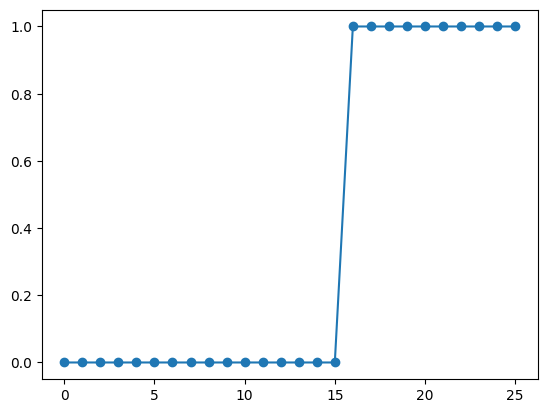

In [22]:
plt.plot(w_fullmask[0:26]*1, marker='o')

# KZ: VM's code, there's something I did quite get yet

In [72]:
#VM code adapted from Supranta's Python script
ggl_efficiency_cut = [0.05]

#VM INPUT BEGINS ---------------------------------------------------------------
for Year in [1]:
  for mask_choice in [1]:
    if (mask_choice == 1):
      # LSST_YX_M1.mask  -----------------------------------
      # lmax \times \theta_min corresponds to the first zero of the Bessel 𝐽0/4
      # lmax x theta_min corresponds to the first zero of the Bessel 𝐽0/4
      # J0 first zero is 2.4048, J4 first zero is 6.3802
      # For theta = 1arc_min, lmax * theta_min = 0.87
      ξp_CUTOFF = 2.756  # cutoff scale in arcminutes
      ξm_CUTOFF = 8.6955  # cutoff scale in arcminutes
      gc_CUTOFF = 21     # Galaxy clustering cutoff in Mpc/h
    elif (mask_choice == 2):
      # LSST_YX_M2.mask  -----------------------------------
      ξp_CUTOFF = 5.512  # cutoff scale in arcminutes
      ξm_CUTOFF = 17.391  # cutoff scale in arcminutes
      gc_CUTOFF = 21     # Galaxy clustering cutoff in Mpc/h
    elif (mask_choice == 3):
      # LSST_YX_M3.mask  ------------------------------------
      ξp_CUTOFF = 11.024 # cutoff scale in arcminutes
      ξm_CUTOFF = 34.782 # cutoff scale in arcminutes
      gc_CUTOFF = 21     # Galaxy clustering cutoff in Mpc/h
    elif (mask_choice == 4):
      # LSST_YX_M4.mask  all ones ---------------------------------------------
      ξp_CUTOFF = 0 # cutoff scale in arcminutes
      ξm_CUTOFF = 0 # cutoff scale in arcminutes
      gc_CUTOFF = 0 # Galaxy clustering cutoff in Mpc/h
    #VM INPUT ENDS -------------------------------------------------------------

    #VM GLOBAL VARIABLES -------------------------------------------------------
    THETA_MIN      = 2.5            # Minimum angular scale (in arcminutes)
    THETA_MAX      = 900.           # Maximum angular scale (in arcminutes)
    N_ANGULAR_BINS = 26             # Number of angular bins
    N_LENS = 5  # Number of lens tomographic bins
    N_SRC  = 5  # Number of source tomographic bins
    N_XI_PS = int(N_SRC * (N_SRC + 1) / 2) 
    N_XI    = int(N_XI_PS * N_ANG_BINS)
    
    # COMPUTE SHEAR SCALE CUTS
    vtmin = THETA_MIN * 2.90888208665721580e-4;
    vtmax = THETA_MAX * 2.90888208665721580e-4;
    logdt = (mt.log(vtmax) - mt.log(vtmin))/N_ANG_BINS;
    theta = np.zeros(N_ANG_BINS+1)
    theta_bins = np.logspace(np.log10(THETA_MIN), np.log10(THETA_MAX), N_ANGULAR_BINS+1)

    for i in range(N_ANG_BINS):
      tmin = mt.exp(mt.log(vtmin) + (i + 0.0) * logdt);
      tmax = mt.exp(mt.log(vtmin) + (i + 1.0) * logdt);
      x = 2./ 3.
      theta[i] = x * (tmax**3 - tmin**3) / (tmax**2- tmin**2)
      theta[i] = theta[i]/2.90888208665721580e-4

    cosmo = FlatLambdaCDM(H0=68, Om0=0.31)
    def ang_cut(z):
      "Get Angular Cutoff from redshit z"
      theta_rad = gc_CUTOFF / cosmo.angular_diameter_distance(z).value
      return theta_rad * 180. / np.pi * 60.

    if (Year == 1):
      zavg = [0.26708,0.38029,0.478487,0.576937,0.681819,0.7919349,
              0.924603,1.0915153,1.331098,1.906975]
    elif (Year == 3):
      zavg = [0.273506,0.397952,0.513557,0.623820,0.734145,0.861416,
              1.012074,1.201271,1.475115,2.106977]
    elif (Year == 6):
      zavg = [0.286842,0.421062,0.536815,0.658517,0.786470,0.925539,
              1.087352,1.288204,1.584155,2.252429]
    elif (Year == 10):
      zavg = [0.293613,0.438698,0.560141,0.681899,0.815300,0.960563,
              1.133677,1.352257,1.664812,2.351624]

    #VM COSMIC SHEAR SCALE CUT -------------------------------------------------
    ξp_mask = np.hstack([(theta_bins[:-1] > ξp_CUTOFF) for i in range(N_XI_PS)])
    ξm_mask = np.hstack([(theta_bins[:-1] > ξm_CUTOFF) for i in range(N_XI_PS)])   

    #VM GGL mask ---------------------------------------------------------------
    if (Year == 1):
      ggl_bin_exclude = [(8,0),(9,0),(9,1),(9,2)]

      ggl_efficiency = [
        [0.4228993546, 0.7441844497, 0.8939407713, 0.9267845868, 0.8989072887,
         0.8466369275, 0.7784515290, 0.6997172106, 0.6081031268, 0.4708767411],
        [0.0955767332, 0.3415688287, 0.6259666632, 0.8356189284, 0.9371902850,
         0.9591118796, 0.9338053584, 0.8757758304, 0.7882464445, 0.6338676765],
        [0.0137715922, 0.0991401347, 0.2974884077, 0.5645155832, 0.7907075325,
         0.9188866970, 0.9694095940, 0.9593507780, 0.8993426849, 0.7532058696],
        [0.0012921293, 0.0181347142, 0.0921535637, 0.2715924116, 0.5251554411,
         0.7515068272, 0.9051921013, 0.9716225928, 0.9627657247, 0.8480050157],
        [0.0000628303, 0.0017945009, 0.0164352035, 0.0829703247, 0.2479311385,
         0.4898624171, 0.7400031346, 0.9105076881, 0.9807957236, 0.9238649333],
        [0.0000020259, 0.0001080410, 0.0017499091, 0.0155650465, 0.0765465048,
         0.2307481332, 0.4925881657, 0.7620081138, 0.9389346381, 0.9705787378],
        [0.0000000172, 0.0000026939, 0.0000806593, 0.0013407840, 0.0117767531,
         0.0611083922, 0.2186581225, 0.5064214465, 0.8117238919, 0.9852146744],
        [0.0000000000, 0.0000000141, 0.0000009753, 0.0000339106, 0.0005918505,
         0.0061393412, 0.0458156089, 0.2058528106, 0.5601779373, 0.9415279600],
        [0.0000000000, 0.0000000001, 0.0000000063, 0.0000002000, 0.0000059218, 
         0.0001329889, 0.0024755845, 0.0285233499, 0.2065774327, 0.7648836094],
        [0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000010,
         0.0000000581, 0.0000037114, 0.0002055835, 0.0100571804, 0.3087437038]
      ]
    if (Year == 3):
      ggl_bin_exclude = [(7,0),(8,0),(8,1),(9,0),(9,1),(9,2),(9,3)]

      ggl_efficiency = [
        [0.4240054633, 0.7610081227, 0.9087000227, 0.9221144212, 0.8829201943,
         0.8210560404, 0.7469236685, 0.6655471176, 0.5737881368, 0.4437489433],
        [0.0838141860, 0.3379423899, 0.6592679689, 0.8651867552, 0.9476840036,
         0.9580718082, 0.9216473824, 0.8557024495, 0.7634718516, 0.6120236462],
        [0.0085294036, 0.0802145755, 0.2934451849, 0.5737271258, 0.7957420500,
         0.9278583517, 0.9721847337, 0.9548790555, 0.8894419438, 0.7433461772],
        [0.0004780308, 0.0107804454, 0.0800969461, 0.2605871589, 0.5161532332, 
         0.7623654761, 0.9166696974, 0.9763406209, 0.9612629674, 0.8435344215],
        [0.0000193936, 0.0009352432, 0.0137974109, 0.0775055697, 0.2407486436,
         0.5050769516, 0.7617407070, 0.9234183477, 0.9831708977, 0.9171004939],
        [0.0000002386, 0.0000345463, 0.0011158072, 0.0117389675, 0.0644162708,
         0.2251887432, 0.5003395952, 0.7752308771, 0.9479437294, 0.9698255174],
        [0.0000000005, 0.0000003872, 0.0000321996, 0.0006918468, 0.0075598664, 
         0.0522776450, 0.2104112234, 0.5126000124, 0.8249012533, 0.9873813673],
        [0.0000000000, 0.0000000004, 0.0000001828, 0.0000104399, 0.0002646055,
         0.0043051405, 0.0390133455, 0.2008259791, 0.5691269299, 0.9426905696],
        [0.0000000000, 0.0000000000, 0.0000000001, 0.0000000169, 0.0000011446,
         0.0000533511, 0.0014231701, 0.0233337702, 0.1998276969, 0.7582227950],
        [0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
         0.0000000065, 0.0000011417, 0.0001251538, 0.0087592870, 0.2967441554]
      ]
    if (Year == 6):    
      ggl_bin_exclude = [(7,0),(8,0),(8,1),(9,0),(9,1),(9,2),(9,3)]

      ggl_efficiency = [
        [0.4240054633, 0.7610081227, 0.9087000227, 0.9221144212, 0.8829201943, 
         0.8210560404, 0.7469236685, 0.6655471176, 0.5737881368, 0.4437489433],
        [0.0838141860, 0.3379423899, 0.6592679689, 0.8651867552, 0.9476840036,
         0.9580718082, 0.9216473824, 0.8557024495, 0.7634718516, 0.6120236462],
        [0.0085294036, 0.0802145755, 0.2934451849, 0.5737271258, 0.7957420500, 
         0.9278583517, 0.9721847337, 0.9548790555, 0.8894419438, 0.7433461772],
        [0.0004780308, 0.0107804454, 0.0800969461, 0.2605871589, 0.5161532332,
         0.7623654761, 0.9166696974, 0.9763406209, 0.9612629674, 0.8435344215],
        [0.0000193936, 0.0009352432, 0.0137974109, 0.0775055697, 0.2407486436,
         0.5050769516, 0.7617407070, 0.9234183477, 0.9831708977, 0.9171004939],
        [0.0000002386, 0.0000345463, 0.0011158072, 0.0117389675, 0.0644162708, 
         0.2251887432, 0.5003395952, 0.7752308771, 0.9479437294, 0.9698255174],
        [0.0000000005, 0.0000003872, 0.0000321996, 0.0006918468, 0.0075598664, 
         0.0522776450, 0.2104112234, 0.5126000124, 0.8249012533, 0.9873813673],
        [0.0000000000, 0.0000000004, 0.0000001828, 0.0000104399, 0.0002646055,
         0.0043051405, 0.0390133455, 0.2008259791, 0.5691269299, 0.9426905696],
        [0.0000000000, 0.0000000000, 0.0000000001, 0.0000000169, 0.0000011446, 
         0.0000533511, 0.0014231701, 0.0233337702, 0.1998276969, 0.7582227950],
        [0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000,
         0.0000000065, 0.0000011417, 0.0001251538, 0.0087592870, 0.2967441554]
      ] 
    if (Year == 10):    
      ggl_bin_exclude = [(7,0),(8,0),(8,1),(9,0),(9,1),(9,2),(9,3)] 

      ggl_efficiency = [
        [0.4240054633, 0.7610081227, 0.9087000227, 0.9221144212, 0.8829201943,
         0.8210560404, 0.7469236685, 0.6655471176, 0.5737881368, 0.4437489433],
        [0.0838141860, 0.3379423899, 0.6592679689, 0.8651867552, 0.9476840036, 
         0.9580718082, 0.9216473824, 0.8557024495, 0.7634718516, 0.6120236462],
        [0.0085294036, 0.0802145755, 0.2934451849, 0.5737271258, 0.7957420500, 
         0.9278583517, 0.9721847337, 0.9548790555, 0.8894419438, 0.7433461772],
        [0.0004780308, 0.0107804454, 0.0800969461, 0.2605871589, 0.5161532332,
         0.7623654761, 0.9166696974, 0.9763406209, 0.9612629674, 0.8435344215],
        [0.0000193936, 0.0009352432, 0.0137974109, 0.0775055697, 0.2407486436,
         0.5050769516, 0.7617407070, 0.9234183477, 0.9831708977, 0.9171004939],
        [0.0000002386, 0.0000345463, 0.0011158072, 0.0117389675, 0.0644162708, 
         0.2251887432, 0.5003395952, 0.7752308771, 0.9479437294, 0.9698255174],
        [0.0000000005, 0.0000003872, 0.0000321996, 0.0006918468, 0.0075598664, 
         0.0522776450, 0.2104112234, 0.5126000124, 0.8249012533, 0.9873813673],
        [0.0000000000, 0.0000000004, 0.0000001828, 0.0000104399, 0.0002646055, 
         0.0043051405, 0.0390133455, 0.2008259791, 0.5691269299, 0.9426905696],
        [0.0000000000, 0.0000000000, 0.0000000001, 0.0000000169, 0.0000011446,
         0.0000533511, 0.0014231701, 0.0233337702, 0.1998276969, 0.7582227950],
        [0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 0.0000000000, 
         0.0000000065, 0.0000011417, 0.0001251538, 0.0087592870, 0.2967441554]
      ]

    γt_mask = [] 
    for i in range(N_LENS): 
      for j in range(N_SRC):
        if (i,j) not in ggl_bin_exclude:
          if ggl_efficiency[i][j] > ggl_efficiency_cut[0]:
            γt_mask.append((theta_bins[:-1] > ang_cut(zavg[i])))
          else:
            γt_mask.append(np.zeros(N_ANG_BINS))
    γt_mask = np.hstack(γt_mask) 

    #VM w_theta mask -----------------------------------------------------------
    w_mask = np.hstack([(theta_bins[:-1] > ang_cut(zavg[i])) for i in range(N_LENS)])
    
    print(ξp_mask.shape)
    print(ang_cut(zavg[0]),ang_cut(zavg[1]), ang_cut(zavg[2]),ang_cut(zavg[3]), ang_cut(zavg[4]))

    #VM output -----------------------------------------------------------------
    mask = np.hstack([ξp_mask, ξm_mask, γt_mask, w_mask])
#     np.savetxt("LSST_Y" + str(Year) + "_M" + str(mask_choice) + ".mask", 
#                np.column_stack((np.arange(0,len(mask)), mask)),
#                fmt='%d %1.1f')



(390,)
83.02682796331985 65.46035125990343 57.23004270020506 52.00681140922313 48.30478885037304


In [63]:
theta_bins

array([  2.5       ,   3.1351573 ,   3.93168452,   4.93057977,
         6.18325727,   7.75419366,   9.72424675,  12.19481728,
        15.29306817,  19.17846972,  24.05100775,  30.16147701,
        37.82438994,  47.4341649 ,  59.48542736,  74.59846874,
        93.55117356, 117.31905791, 147.12548036, 184.50460955,
       231.38038945, 290.16556688, 363.88587816, 456.33578701,
       572.27378967, 717.66733986, 900.        ])

In [43]:
print(mask.shape)
print(np.count_nonzero(mask))

(1524,)
900


# KZ: apply a theta_maximum=const first

In [89]:
####Fiducial
ξ_plus_CUTOFF  = 2.756             # cutoff scale in arcminutes
ξ_minus_CUTOFF = 8.696             # cutoff scale in arcminutes

lens_cutoff  = [80.88, 54.19, 42.85, 35.43, 29.73]       # cutoff scale in arcmins. 
                                                        # Different for different redshift bins
lens_maximum = [0, 0, 0, 0, 0]       # cutoff scale in arcmins. 
                                                        # Different for different redshift bins
##########

ξ_plus_mask  = (theta_bins[:-1] > ξ_plus_CUTOFF)
ξ_minus_mask = (theta_bins[:-1] > ξ_minus_CUTOFF)

ξ_plus_fullmask  = np.hstack([ξ_plus_mask for i in range(N_XI_POWERSPECTRA)])
ξ_minus_fullmask = np.hstack([ξ_minus_mask for i in range(N_XI_POWERSPECTRA)])


lens_mask_list = [(theta_bins[:-1] > lens_cutoff[i]) for i in range(N_LENS_BINS)]
lens_mask_list_limber = [(theta_bins[:-1] < lens_maximum[i]) for i in range(N_LENS_BINS)]


γt_fullmask_list = []

for i in range(N_LENS_BINS):
    for j in range(N_SRC_BINS):
        lens_mask = lens_mask_list[i]
        γt_fullmask_list.append(lens_mask)
        
γt_fullmask = np.hstack(γt_fullmask_list)    

w_fullmask = np.hstack(lens_mask_list) * np.hstack(lens_mask_list_limber)

lsst_3x2_mask = np.hstack([ξ_plus_fullmask, ξ_minus_fullmask, γt_fullmask, w_fullmask])


print("xi_p data point", np.count_nonzero(ξ_plus_fullmask))
print("xi_m data point", np.count_nonzero(ξ_minus_fullmask))
print("gamma_t data point", np.count_nonzero(γt_fullmask))
print("w_theta data point", np.count_nonzero(w_fullmask))
print("3x2pt data point", np.count_nonzero(lsst_3x2_mask))


with open('lsst_3x2_limber.mask', 'w') as f:
    for i, mask_val in enumerate(lsst_3x2_mask):
        f.write("%d\t%d\n"%(i, int(mask_val)))

xi_p data point 375
xi_m data point 300
gamma_t data point 320
w_theta data point 0
3x2pt data point 995


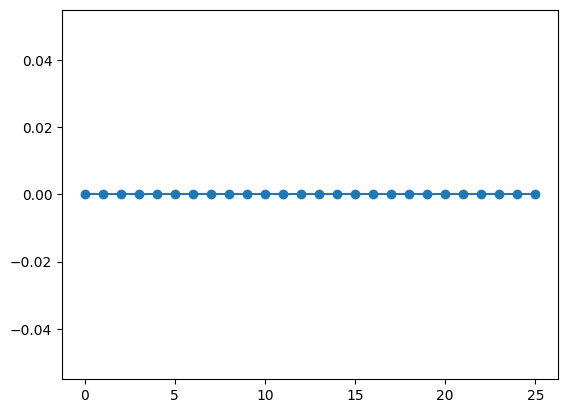

In [90]:
plt.plot(w_fullmask[0:26]*1, marker='o')

# HERE's the results for limber scale cut test. The goal is to make chi2=0, turning on and off limber

    0. Fiducial scale cut: chi2 = 95
    1. theta_max=150:      chi2 = 37
    2. theta_max=100:      chi2 = 26
    3. theta_max=75:       chi2 = 21
    4. theta_max=50:       chi2 = 13 (6 points left)
    5. remove all          chi2 = 0... as it should